# CNN implementation

## Import and become one with the data

In [ ]:
!nvidia-smi

Fri Apr 22 10:48:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
dataset_path = "/content/drive/MyDrive/Project dataset/chest X ray subsets.zip"

In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile(dataset_path)
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 2 classes of food image data
for dirpath, dirnames, filenames in os.walk("chest X ray subsets"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in chest X ray subsets
There are 3 directories and 0 images in chest X ray subsets/Dataset 3
There are 0 directories and 10192 images in chest X ray subsets/Dataset 3/Healthy
There are 0 directories and 3616 images in chest X ray subsets/Dataset 3/Covid-19
There are 0 directories and 1345 images in chest X ray subsets/Dataset 3/Viral Pneumonia
There are 2 directories and 0 images in chest X ray subsets/Dataset 2
There are 0 directories and 10192 images in chest X ray subsets/Dataset 2/Healthy
There are 0 directories and 3616 images in chest X ray subsets/Dataset 2/Covid-19
There are 2 directories and 0 images in chest X ray subsets/Dataset 1
There are 0 directories and 721 images in chest X ray subsets/Dataset 1/Healthy
There are 0 directories and 403 images in chest X ray subsets/Dataset 1/Covid-19


In [ ]:
pip install split-folders

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
def split_folders():
  splitfolders.ratio(input=input_folder, output=output_folder,
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

In [ ]:
# Dataset 1

input_folder = "/content/chest X ray subsets/Dataset 1"
os.mkdir("/content/chest X ray subsets/Dataset 1_split")
output_folder = "/content/chest X ray subsets/Dataset 1_split"

split_folders()

Copying files: 1124 files [00:00, 4193.74 files/s]


In [ ]:
# Dataset 2

input_folder = "/content/chest X ray subsets/Dataset 2"
os.mkdir("/content/chest X ray subsets/Dataset 2_split")
output_folder = "/content/chest X ray subsets/Dataset 2_split"

split_folders()

Copying files: 13808 files [00:04, 3150.44 files/s]


In [ ]:
# Dataset 3

input_folder = "/content/chest X ray subsets/Dataset 3"
os.mkdir("/content/chest X ray subsets/Dataset 3_split")
output_folder = "/content/chest X ray subsets/Dataset 3_split"

split_folders()

Copying files: 15153 files [00:04, 3398.95 files/s]


In [ ]:
# Setup the train and test directories for dataset 1
train_dir_dataset_1 = "/content/chest X ray subsets/Dataset 1_split/train/"
test_dir_dataset_1 = "/content/chest X ray subsets/Dataset 1_split/val/"

In [ ]:
# Setup the train and test directories for dataset 2
train_dir_dataset_2 = "/content/chest X ray subsets/Dataset 2_split/train/"
test_dir_dataset_2 = "/content/chest X ray subsets/Dataset 2_split/val/"

In [ ]:
# Setup the train and test directories for dataset 3
train_dir_dataset_3 = "/content/chest X ray subsets/Dataset 3_split/train/"
test_dir_dataset_3 = "/content/chest X ray subsets/Dataset 3_split/val/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
dir_path = pathlib.Path(train_dir_dataset_3)
class_names = np.array(sorted([item.name for item in dir_path.glob('*')]))
class_names

array(['Covid-19', 'Healthy', 'Viral Pneumonia'], dtype='<U15')

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")   # show the shape of the image, As len of img.shape is 2, so it is greyscale

  return img

Image shape: (299, 299)


array([[0.16862746, 0.19607843, 0.21960784, ..., 0.33333334, 0.3137255 ,
        0.30588236],
       [0.16862746, 0.19607843, 0.21960784, ..., 0.33333334, 0.3137255 ,
        0.29803923],
       [0.16470589, 0.19215687, 0.21960784, ..., 0.34117648, 0.31764707,
        0.3019608 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

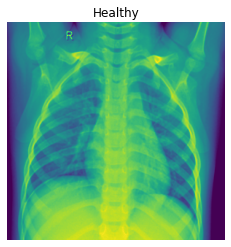

In [ ]:
import random 

# Visualize, visualize, visualize
view_random_image(target_dir=train_dir_dataset_1,
                  target_class=random.choice(class_names))

## Preparation of data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# From ImageDataGenerator, we are preprocessing and augmenting our data
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

### Loading the images into data loaders

In [ ]:
# Dataset 1

train_dir = train_dir_dataset_1
test_dir = test_dir_dataset_1

In [ ]:
# Dataset 2

train_dir = train_dir_dataset_2
test_dir = test_dir_dataset_2

In [ ]:
# Dataset 3

train_dir = train_dir_dataset_3
test_dir = test_dir_dataset_3

In [ ]:
# From flow_from_directory, we are loading images into data loaders

img_width = 224
img_height = 224
batch_size = 32

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,
                                               #class_mode="binary",
                                               class_mode="categorical",
                                               color_mode='grayscale',
                                               shuffle=True)  # shuffling between normal and covid

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(img_width, img_height),
                                             batch_size=batch_size,
                                             #class_mode="binary",
                                             class_mode="categorical",
                                             color_mode='grayscale',
                                             shuffle=False)   # No need to shuffle data

Found 12121 images belonging to 3 classes.
Found 3032 images belonging to 3 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

# Wonderful, it seems our images and labels are in batches of 32.

(32, 32)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.],
      dtype=float32)

In [ ]:
train_data[0]

(array([[[[0.28235295],
          [0.5137255 ],
          [0.6313726 ],
          ...,
          [0.10588236],
          [0.08235294],
          [0.03137255]],
 
         [[0.2627451 ],
          [0.8235295 ],
          [0.6784314 ],
          ...,
          [0.09019608],
          [0.07058824],
          [0.01960784]],
 
         [[0.25882354],
          [0.8078432 ],
          [0.5137255 ],
          ...,
          [0.08627451],
          [0.07058824],
          [0.01960784]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [ ]:
# Dataset 1

len(train_data), len(test_data)

(29, 8)

In [ ]:
# Dataset 2

len(train_data), len(test_data)

(346, 87)

In [ ]:
# Dataset 3

len(train_data), len(test_data)

(379, 95)

## 3. Create a model (start with a baseline)

In [ ]:
# Import dependencies for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# CNN for binary classification

cnn_model = Sequential([
  Conv2D(filters=10,
         kernel_size=3, # (3, 3)
         activation="relu",
         input_shape=(img_width, img_height, 1)),    
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  MaxPool2D(pool_size=2), # (2, 2)
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(128, activation="relu"),
  Dense(64, activation="relu"),
  Dense(units = 1, activation="sigmoid")                           
])

# Compile the model
cnn_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

In [ ]:
# CNN for multiclass classification

cnn_model = Sequential([
  Conv2D(filters=10,
         kernel_size=3, # (3, 3)
         activation="relu",
         input_shape=(img_width, img_height, 1)),    # colour channel is 1 because grayscale images have 1 colour channel
  # output shape in model_1.summary: ( img_width-kernal_width+strides, img_height-kernal_height+strides, filters )
  # ( 512-3+1, 512-3+1, 10 ) = (510, 510, 10)
  # (None, 510, 510, 10) ->  Keras adds an extra dimension 'none' since batch size can vary.
  # Param #: (kernel_height * kernel_width * input_channels * output_channels) + (output_channels)
  # ( (3*3*1*10)+10 ) = 100 -> output_channel=filters
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  MaxPool2D(pool_size=2), # (2, 2)
  # output shape in model_1.summary: ( (img_width-pool_width)/strides+1), (img_height-pool_height)/strides+1), filters )
  # ( 508-2/2+1,508-2/2+1, 10) = (254, 254, 10) -> strides are by default (2,2)
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  Conv2D(10, 3, activation="relu", input_shape=(img_width, img_height, 1)),
  MaxPool2D(pool_size=2),
  Flatten(),
  # output shape in model_1.summary: img_wigth*img_height*filters
  # 60*60*10 = 36000
  Dense(128, activation="relu"),
  Dense(64, activation="relu"),
  Dense(units = 3, activation="softmax")                           
])

# Compile the model
cnn_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer="adam",
                metrics=['accuracy'])

In [ ]:
# Binnary model's summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      100       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Multiclass model's summary
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      100       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

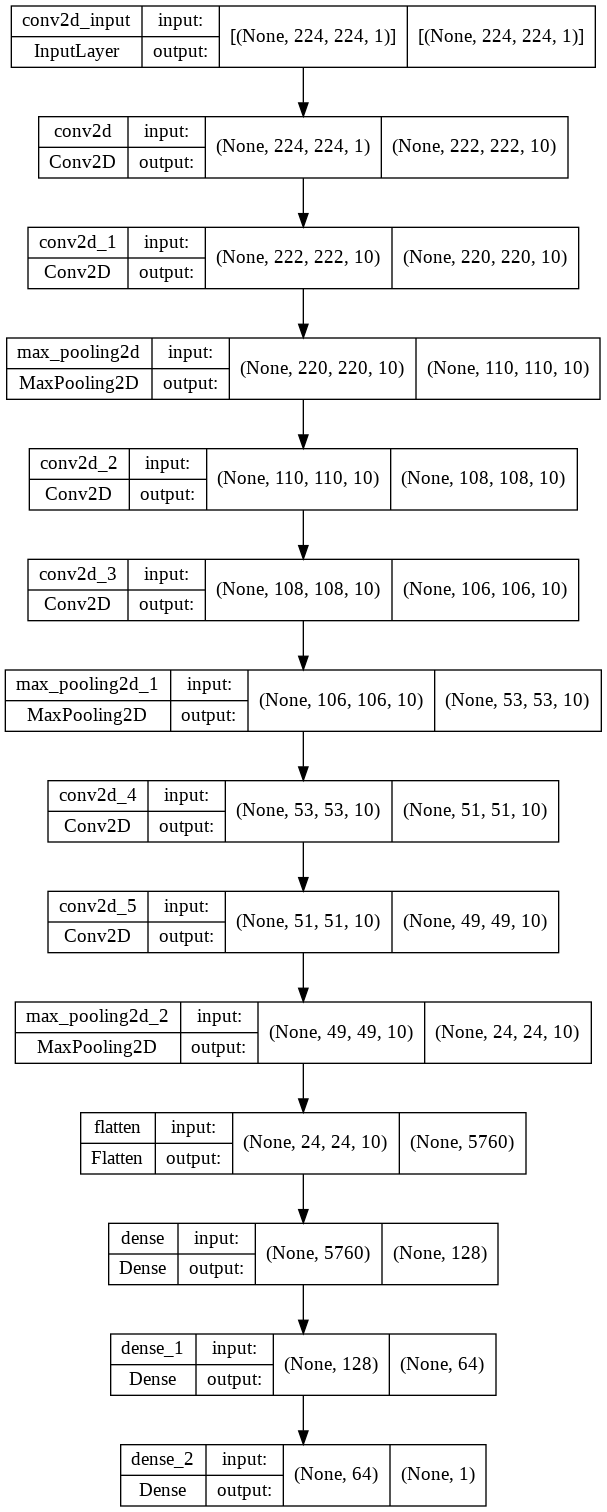

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn_model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

### Fit a model

In [ ]:
epochs = 10

In [ ]:
# Dataset 1

# Fit the model

import time
start = time.time()
history_1 = cnn_model.fit(train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

end = time.time()
print("Total training time for ", epochs, " epochs: " , round(end - start), "seconds/", round((end - start)/60) , " minutes")

Epoch 1/10
29/29 [==============================] - 5s 130ms/step - loss: 0.5424 - accuracy: 0.7027 - val_loss: 0.2043 - val_accuracy: 0.9425
Epoch 2/10
29/29 [==============================] - 4s 121ms/step - loss: 0.2167 - accuracy: 0.9220 - val_loss: 0.1578 - val_accuracy: 0.9513
Epoch 3/10
29/29 [==============================] - 4s 119ms/step - loss: 0.1772 - accuracy: 0.9365 - val_loss: 0.1930 - val_accuracy: 0.9204
Epoch 4/10
29/29 [==============================] - 4s 123ms/step - loss: 0.1622 - accuracy: 0.9443 - val_loss: 0.1398 - val_accuracy: 0.9558
Epoch 5/10
29/29 [==============================] - 4s 121ms/step - loss: 0.1334 - accuracy: 0.9521 - val_loss: 0.1689 - val_accuracy: 0.9513
Epoch 6/10
29/29 [==============================] - 3s 119ms/step - loss: 0.1271 - accuracy: 0.9532 - val_loss: 0.1674 - val_accuracy: 0.9425
Epoch 7/10
29/29 [==============================] - 4s 119ms/step - loss: 0.1559 - accuracy: 0.9376 - val_loss: 0.1257 - val_accuracy: 0.9513
Epoch 

In [ ]:
# Dataset 2

# Fit the model

import time
start = time.time()

history_2 = cnn_model.fit(train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

end = time.time()
print("Total training time for ", epochs, " epochs: " , round(end - start), "seconds/", round((end - start)/60) , " minutes")

Epoch 1/10
346/346 [==============================] - 42s 119ms/step - loss: 0.4068 - accuracy: 0.8071 - val_loss: 0.2677 - val_accuracy: 0.8853
Epoch 2/10
346/346 [==============================] - 42s 121ms/step - loss: 0.2578 - accuracy: 0.8962 - val_loss: 0.2330 - val_accuracy: 0.9157
Epoch 3/10
346/346 [==============================] - 41s 119ms/step - loss: 0.1868 - accuracy: 0.9276 - val_loss: 0.1716 - val_accuracy: 0.9330
Epoch 4/10
346/346 [==============================] - 41s 118ms/step - loss: 0.1529 - accuracy: 0.9390 - val_loss: 0.1535 - val_accuracy: 0.9374
Epoch 5/10
346/346 [==============================] - 41s 118ms/step - loss: 0.1246 - accuracy: 0.9521 - val_loss: 0.1551 - val_accuracy: 0.9381
Epoch 6/10
346/346 [==============================] - 41s 117ms/step - loss: 0.0933 - accuracy: 0.9657 - val_loss: 0.1429 - val_accuracy: 0.9511
Epoch 7/10
346/346 [==============================] - 41s 119ms/step - loss: 0.0773 - accuracy: 0.9718 - val_loss: 0.1501 - val_ac

In [ ]:
# Dataset 3

import time
start = time.time()

# Fit the model
history_3 = cnn_model.fit(train_data,
                        epochs=20,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

end = time.time()
print("Total training time for ", epochs, " epochs: " , round(end - start), "seconds/", round((end - start)/60) , " minutes")

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


379/379 [==============================] - 49s 124ms/step - loss: 0.4628 - accuracy: 0.8046 - val_loss: 0.3035 - val_accuracy: 0.8813
Epoch 2/20
379/379 [==============================] - 46s 121ms/step - loss: 0.2628 - accuracy: 0.8951 - val_loss: 0.2459 - val_accuracy: 0.9060
Epoch 3/20
379/379 [==============================] - 46s 121ms/step - loss: 0.1901 - accuracy: 0.9246 - val_loss: 0.1919 - val_accuracy: 0.9297
Epoch 4/20
379/379 [==============================] - 45s 119ms/step - loss: 0.1420 - accuracy: 0.9456 - val_loss: 0.1782 - val_accuracy: 0.9350
Epoch 5/20
379/379 [==============================] - 46s 120ms/step - loss: 0.1198 - accuracy: 0.9549 - val_loss: 0.1864 - val_accuracy: 0.9317
Epoch 6/20
379/379 [==============================] - 46s 120ms/step - loss: 0.0852 - accuracy: 0.9677 - val_loss: 0.1988 - val_accuracy: 0.9288
Epoch 7/20
379/379 [==============================] - 45s 119ms/step - loss: 0.0680 - accuracy: 0.9744 - val_loss: 0.2117 - val_accuracy: 0.9

## Saving the models (say for later use)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.

# change accordingly
#cnn_model.save('/content/CNN_model_1.h5')
#cnn_model.save('/content/CNN_model_2.h5')
cnn_model.save('/content/CNN_model_3.h5')

## 5. Evaulate the model

In [ ]:
# Dataset 1

# Evaluate on test data
cnn_model.evaluate(test_data)

8/8 [==============================] - 1s 78ms/step - loss: 0.1444 - accuracy: 0.9602


[0.14440421760082245, 0.9601770043373108]

In [ ]:
# Dataset 2

# Evaluate on test data
cnn_model.evaluate(test_data)

87/87 [==============================] - 8s 87ms/step - loss: 0.1604 - accuracy: 0.9558


[0.1604185253381729, 0.9558451175689697]

In [ ]:
# Dataset 3

# Evaluate on test data
cnn_model.evaluate(test_data)

95/95 [==============================] - 8s 87ms/step - loss: 0.2658 - accuracy: 0.9528


[0.2657800316810608, 0.9528363943099976]

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  validation_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  validation_accuracy = history.history["val_accuracy"]

  # how many epochs did we run for?
  epochs = range(len(history.history["loss"]))
  
  # Plot loss
  plt.figure(figsize=(17, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, validation_loss, label="Validation loss")
  plt.title("loss (training and testing)")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, validation_accuracy, label="Validation accuracy")
  plt.title("accuracy (training and testing)")
  plt.xlabel("epochs")
  plt.legend()

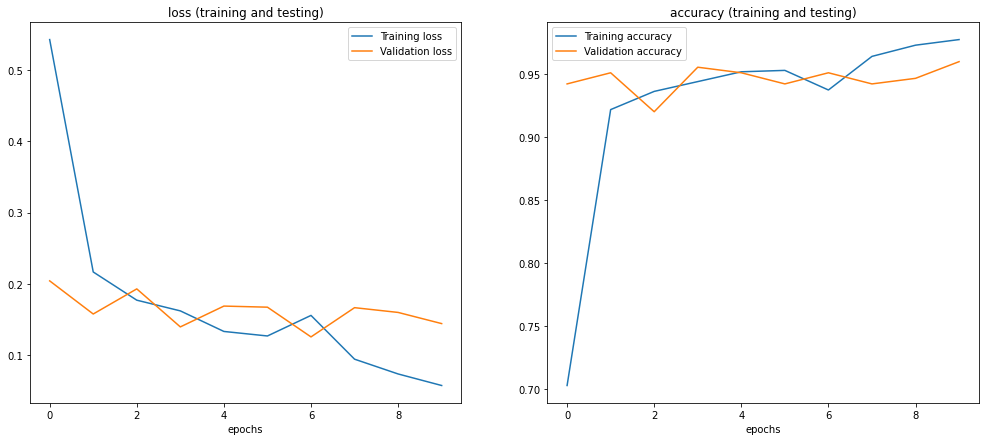

In [ ]:
# Dataset 1

plot_loss_curves(history=history_1)

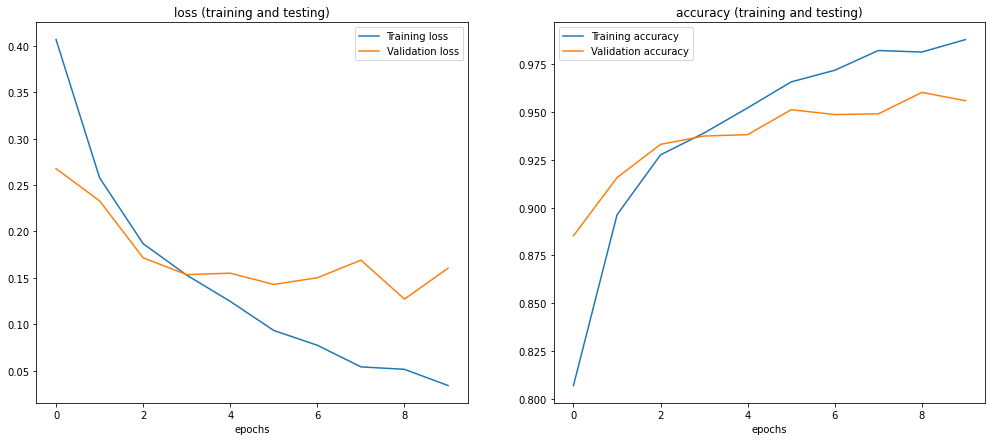

In [ ]:
# Dataset 2

plot_loss_curves(history=history_2)

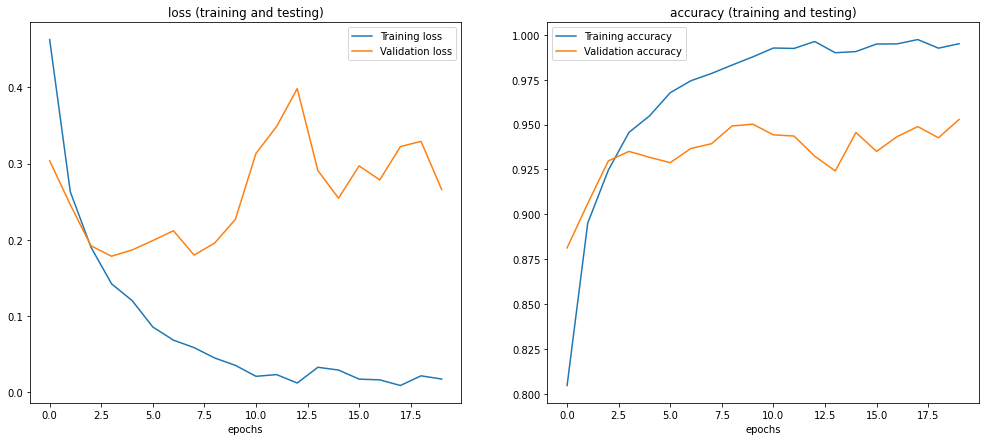

In [ ]:
# Dataset 3

plot_loss_curves(history=history_3)

Looks like our model is overfitting as it is giving great results on training data and performs badly(no soo;) on validation data(un_seen data)

Steps for reducing overfitting:
* Add more data.
* Use data augmentation.
* Use architectures that generalize well.
* Add regularization (mostly dropout, L1/L2 regularization are also possible)
* Reduce architecture complexity.

## Prediction on custom image

In [ ]:
img = tf.io.read_file('/content/COVID-5.png')
# Decode the read file into a tensor
img = tf.image.decode_image(img)
img, img.shape

# Our data has shapes of [229, 229, 1]
# images are grayscale.... lock it... hehe

(<tf.Tensor: shape=(299, 299, 1), dtype=uint8, numpy=
 array([[[226],
         [226],
         [227],
         ...,
         [217],
         [216],
         [216]],
 
        [[180],
         [180],
         [179],
         ...,
         [ 90],
         [ 90],
         [ 91]],
 
        [[177],
         [175],
         [176],
         ...,
         [ 57],
         [ 56],
         [ 58]],
 
        ...,
 
        [[ 85],
         [ 79],
         [ 95],
         ...,
         [ 90],
         [ 85],
         [ 81]],
 
        [[ 84],
         [ 79],
         [ 96],
         ...,
         [ 88],
         [ 84],
         [ 81]],
 
        [[ 83],
         [ 79],
         [ 93],
         ...,
         [ 89],
         [ 84],
         [ 83]]], dtype=uint8)>, TensorShape([299, 299, 1]))

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def pred_and_plot(model, img_path):
  img = image.load_img(img_path, target_size=(224, 224),color_mode='grayscale')
  
  # Preprocessing the image
  img = image.img_to_array(img)
  img = img/255
  img = np.expand_dims(img, axis=0)
  
  # predict image
  pred= model.predict(img)
  print(pred)              # let's see what actually pred is
  # prediction probabilty practice
  print('{:.2f}%'.format(max(pred[0])*100))

  # length of pred (which is 2D list)
  rows = len(pred)
  columns = len(pred[0])
  total_length = rows * columns
  print(total_length)
 
  # plot image
  plt.figure(figsize=(6,6))
  plt.axis('off')

  if total_length == 2:             # for binary classification
    pred_class = class_names[int(tf.round(pred))]
  else:
    if len(pred[0]) > 1:            # for multiclass classification
      pred_class = class_names[tf.argmax(pred[0])]
    else:
      pred_class = class_names[int(tf.round(pred[0]))]
  plt.title("Chest X-Ray\n"+"Predicted label: "+ pred_class + " with prediction probabilty of " + '{:.2f}%'.format(max(pred[0])*100) +  "\nOriginal label: "
  +os.path.basename(img_path))  
  plt.imshow(np.squeeze(img))
  plt.show()

In [ ]:
pred = [[0.0038751, 0.2572556, 0.7388693]]
print(max(pred[0]))

0.7388693


[[0.9926109  0.00619162 0.00119754]]
99.26%
3


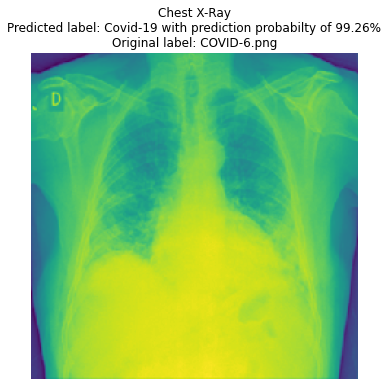

In [ ]:
pred_and_plot(model=cnn_model,
              img_path='/content/COVID-6.png')

[[2.6924694e-09 6.9523418e-09 1.0000000e+00]]
100.00%
3


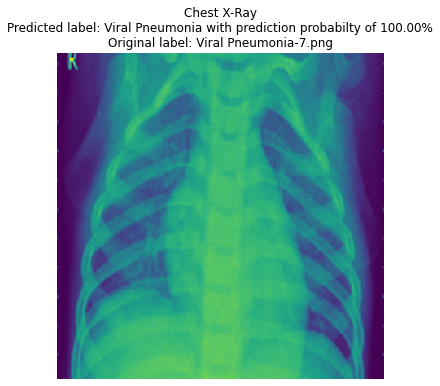

In [ ]:
pred_and_plot(model=cnn_model,
              img_path='/content/Viral Pneumonia-7.png')

### Load the saved model and evaluate it 

In [ ]:
# load the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('cnn_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      100       
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_33 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

Covid-19


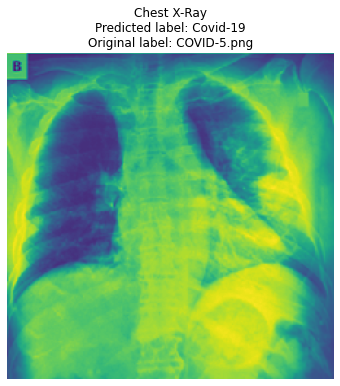

In [ ]:
# prediction with loaded model

pred_and_plot(new_model, '/content/COVID-5.png')

In [ ]:
# Make some predictions with our model 
pred_probs = tf.round(new_model.predict(test_data)) # probs is short for "prediction probabilities"

pred_probs, pred_probs.shape

(array([[0.14875   ],
        [0.27689564],
        [0.20945826],
        ...,
        [0.71502495],
        [0.9997907 ],
        [0.9991148 ]], dtype=float32), (3032, 1))

In [ ]:
y_preds = tf.reshape(pred_probs, [-1])
y_preds = np.array(y_preds).astype(int)

y_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Confusion matrix

In [ ]:
# Lets make function for y_preds
def model_pred(model):
  pred_probs = tf.round(model.predict(test_data))
  y_preds = tf.reshape(pred_probs, [-1])
  y_preds = np.array(y_preds).astype(int)
  return y_preds

In [ ]:
y_preds = model_pred(model = cnn_model)

In [ ]:
len(test_data)

8

In [ ]:
import math
n=32
number_of_examples = len(test_data.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * n)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_data[i][1]))
  

test_labels = np.array(test_labels).astype(int)
test_labels[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(test_labels, tf.round(y_preds))
sklearn_accuracy

0.9690265486725663

In [ ]:
test_labels.shape, y_preds.shape

((2763,), (2763,))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[ 622,  102],
       [  98, 1941]])

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Get the class names
class_names

array(['Covid-19', 'Healthy'], dtype='<U8')

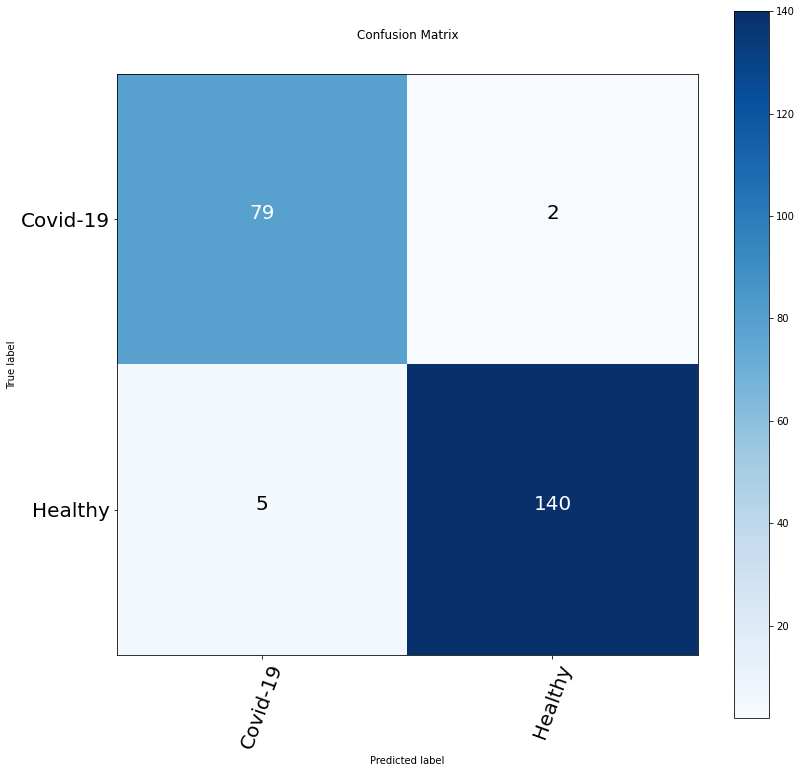

In [ ]:
# Plot a confusion matrix for dataset 1

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=['Covid-19', 'Healthy'],
                      figsize=(13, 13),
                      text_size=20,
                      norm=False,
                      savefig=True)

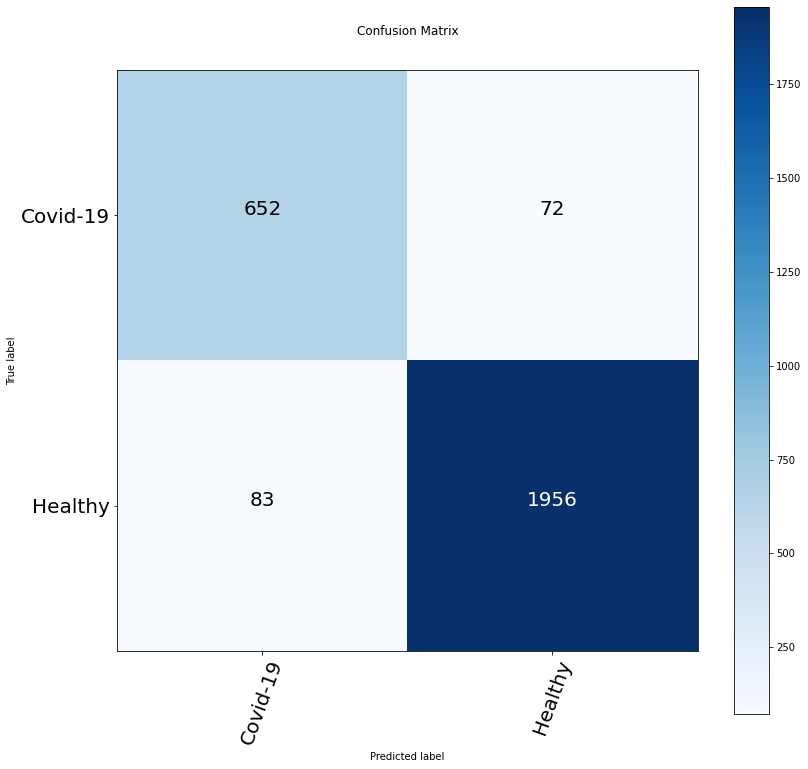

In [ ]:
# Plot a confusion matrix for dataset 2

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=['Covid-19', 'Healthy'],
                      figsize=(13, 13),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
# for dataset 1

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_preds))

# The classification_report() outputs the precision, recall and f1-score's per class.

# A reminder:

# Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).
# Recall - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.
# F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        81
           1       0.99      0.97      0.98       145

    accuracy                           0.97       226
   macro avg       0.96      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



In [ ]:
# for dataset 2

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       724
           1       0.96      0.96      0.96      2039

    accuracy                           0.94      2763
   macro avg       0.93      0.93      0.93      2763
weighted avg       0.94      0.94      0.94      2763

